In [1]:
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
#warnings.filterwarnings("ignore", message="numpy.dtype size changed")
#warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import jarque_bera
#import pingouin as pg
from scipy.stats import spearmanr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual



sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
import pingouin as pg

In [3]:
games_data = pd.read_csv("basic_data_2023-original.csv", delimiter=',')

In [12]:
games_data.shape

(2000, 19)

In [8]:
games_data.dtypes

rank           int64
bgg_url       object
game_id        int64
               ...  
designer      object
categories    object
mechanics     object
Length: 19, dtype: object

In [9]:
games_data.head(5)

,rank,bgg_url,game_id,name,...,owned,designer,categories,mechanics
0,1,https://boardgamegeek.com/boardgame/224517,224517,Brass: Birmingham,...,53631,"Gavan Brown, Matt Tolman, Martin Wallace","['Economic', 'Industry / Manufacturing', 'Post...","['Hand Management', 'Income', 'Loans', 'Market..."
1,2,https://boardgamegeek.com/boardgame/161936,161936,Pandemic Legacy: Season 1,...,78310,"Rob Daviau, Matt Leacock","['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma..."
2,3,https://boardgamegeek.com/boardgame/174430,174430,Gloomhaven,...,91428,Isaac Childres,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign..."
3,4,https://boardgamegeek.com/boardgame/342942,342942,Ark Nova,...,46422,Mathias Wigge,"['Animals', 'Economic', 'Environmental']","['End Game Bonuses', 'Hand Management', 'Hexag..."
4,5,https://boardgamegeek.com/boardgame/233078,233078,Twilight Imperium: Fourth Edition,...,25806,"Dane Beltrami, Corey Konieczka, Christian T. P...","['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area Majority / Influence..."


In [31]:
results = smf.ols('num_votes~ avg_rating', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              num_votes   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.05
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.25e-05
Time:                        09:30:33   Log-Likelihood:                -21544.
No. Observations:                2000   AIC:                         4.309e+04
Df Residuals:                    1998   BIC:                         4.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.033e+04   4273.189     -2.417      0.0

# review

In [11]:
results = smf.ols('rank ~ owned', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     657.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          1.55e-125
Time:                        14:07:58   Log-Likelihood:                -15270.
No. Observations:                2000   AIC:                         3.054e+04
Df Residuals:                    1998   BIC:                         3.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1205.4532     13.765     87.575      0.0

In [12]:
results = smf.ols('num_votes ~ owned', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              num_votes   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 5.414e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:07:59   Log-Likelihood:                -18218.
No. Observations:                2000   AIC:                         3.644e+04
Df Residuals:                    1998   BIC:                         3.645e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -328.3519     60.080     -5.465      0.0

In [13]:
results = smf.ols('num_votes~ geek_rating', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              num_votes   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1157.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          1.58e-200
Time:                        14:08:04   Log-Likelihood:                -21096.
No. Observations:                2000   AIC:                         4.220e+04
Df Residuals:                    1998   BIC:                         4.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.02e+05   3234.876    -31.544      

In [10]:
results = smf.ols('avg_rating ~num_votes ', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.05
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.25e-05
Time:                        14:07:49   Log-Likelihood:                -1212.8
No. Observations:                2000   AIC:                             2430.
Df Residuals:                    1998   BIC:                             2441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3388      0.012    613.465      0.0

In [16]:
results = smf.ols('age~ avg_rating', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     261.5
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.24e-55
Time:                        15:44:56   Log-Likelihood:                -4518.9
No. Observations:                2000   AIC:                             9042.
Df Residuals:                    1998   BIC:                             9053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6011      0.859     -3.030      0.0

In [31]:
results = smf.ols('min_time~ avg_rating', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               min_time   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.67e-29
Time:                        15:56:51   Log-Likelihood:                -10686.
No. Observations:                2000   AIC:                         2.138e+04
Df Residuals:                    1998   BIC:                         2.139e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -155.0660     18.750     -8.270      0.0

In [22]:
results = smf.ols('geek_rating~ owned', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            geek_rating   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1019.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          5.36e-181
Time:                        15:46:44   Log-Likelihood:                -726.86
No. Observations:                2000   AIC:                             1458.
Df Residuals:                    1998   BIC:                             1469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5151      0.010    681.158      0.0

In [7]:
results = smf.ols('avg_rating~ min_players', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     135.1
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.93e-30
Time:                        10:08:16   Log-Likelihood:                -1156.4
No. Observations:                2000   AIC:                             2317.
Df Residuals:                    1998   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.6566      0.027    286.664      

In [34]:
results = smf.ols('geek_rating~ min_players', data=games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            geek_rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.84
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           0.000121
Time:                        15:59:46   Log-Likelihood:                -1131.5
No. Observations:                2000   AIC:                             2267.
Df Residuals:                    1998   BIC:                             2278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7872      0.026    257.300      

In [41]:
games_data["min_players"].mean()

1.8285

In [45]:
games_data["avg_time"].mode()

0    60
Name: avg_time, dtype: int64

In [47]:
games_data["avg_time"].mean()

98.9625

In [43]:
games_data["min_players"].mode()

0    2
Name: min_players, dtype: int64

In [42]:
games_data["max_players"].mean()

5.041

In [44]:
games_data["max_players"].mode()

0    4
Name: max_players, dtype: int64

In [13]:
#see keys
print(games_data.keys())

Index(['rank', 'bgg_url', 'game_id', 'name', 'min_players', 'max_players',
       'avg_time', 'min_time', 'max_time', 'weight', 'year', 'age',
       'avg_rating', 'geek_rating', 'num_votes', 'owned', 'designer',
       'categories', 'mechanics'],
      dtype='object')


In [14]:
#checking for correlations with spearman
games_data.corr(method = "spearman").round(2)

C:\Users\bolivar3\AppData\Local\Temp\ipykernel_22180\3373820273.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  games_data.corr(method = "spearman").round(2)


,rank,game_id,min_players,max_players,...,avg_rating,geek_rating,num_votes,owned
rank,1.00,-0.03,0.08,0.00,...,-0.51,-1.00,-0.74,-0.74
game_id,-0.03,1.00,-0.37,-0.07,...,0.39,0.03,-0.29,-0.09
min_players,0.08,-0.37,1.00,0.17,...,-0.28,-0.08,0.12,0.00
...,...,...,...,...,...,...,...,...,...
geek_rating,-1.00,0.03,-0.08,-0.00,...,0.51,1.00,0.74,0.74
num_votes,-0.74,-0.29,0.12,0.14,...,-0.10,0.74,1.00,0.93
owned,-0.74,-0.09,0.00,0.08,...,0.01,0.74,0.93,1.00


C:\Users\bolivar3\AppData\Local\Temp\ipykernel_22180\1623518852.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = games_data.corr(method = "spearman")


Text(0.5, 1.0, 'Correlation matrix')

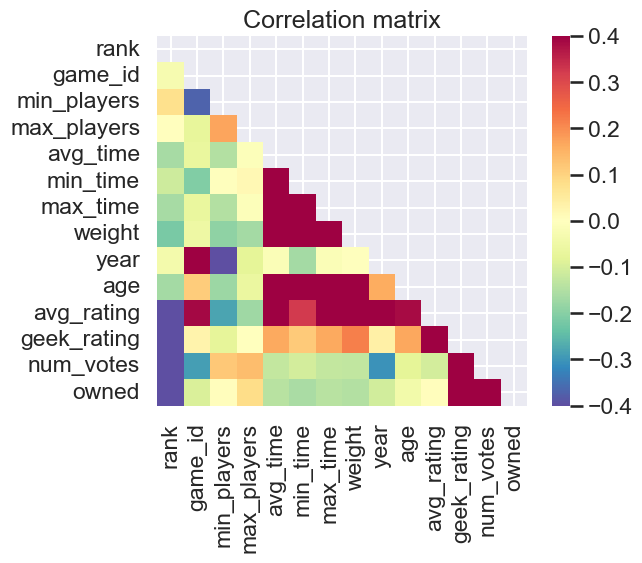

In [15]:
corrs = games_data.corr(method = "spearman")
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

<Axes: xlabel='min_players', ylabel='avg_rating'>

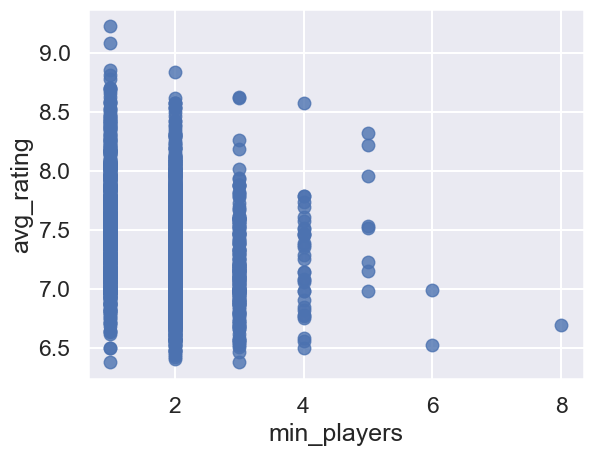

In [18]:
sns.regplot(x=games_data["min_players"], y=games_data["avg_rating"],  fit_reg=False)

<Axes: xlabel='min_players', ylabel='geek_rating'>

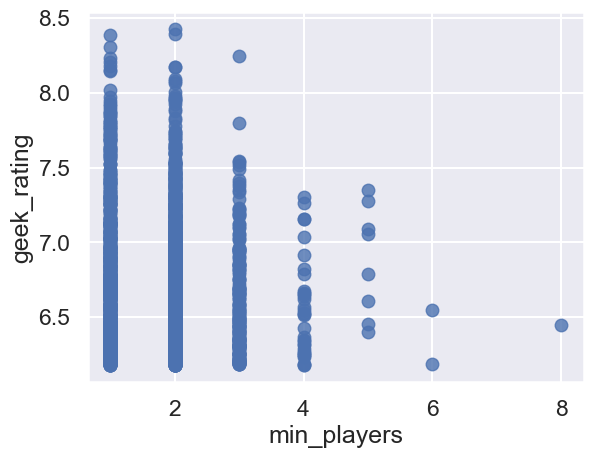

In [20]:
sns.regplot(x=games_data["min_players"], y=games_data["geek_rating"],  fit_reg=False)

<Axes: xlabel='max_players', ylabel='avg_rating'>

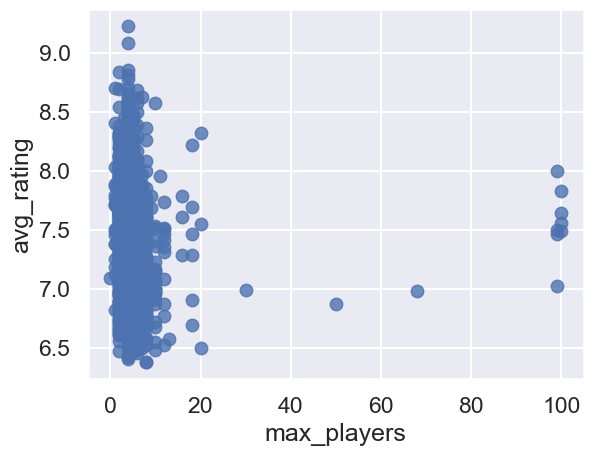

In [19]:
sns.regplot(x=games_data["max_players"], y=games_data["avg_rating"],  fit_reg=False)

<Axes: xlabel='max_players', ylabel='geek_rating'>

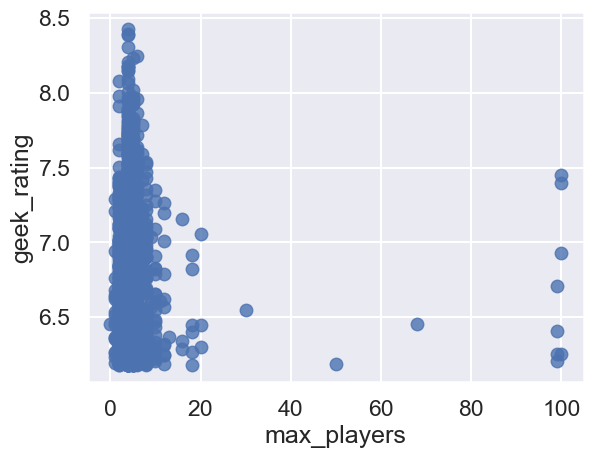

In [22]:
sns.regplot(x=games_data["max_players"], y=games_data["geek_rating"],  fit_reg=False)

Using the number of votes and the geek rating it seems that there is weak signifiance between the numner of votes and ratings. Looking at a scatterplot reveals storyl. However, there is an interesting phenomenon in that after a certain amount of votes, the ratings seem to go down. 

<Axes: xlabel='num_votes', ylabel='geek_rating'>

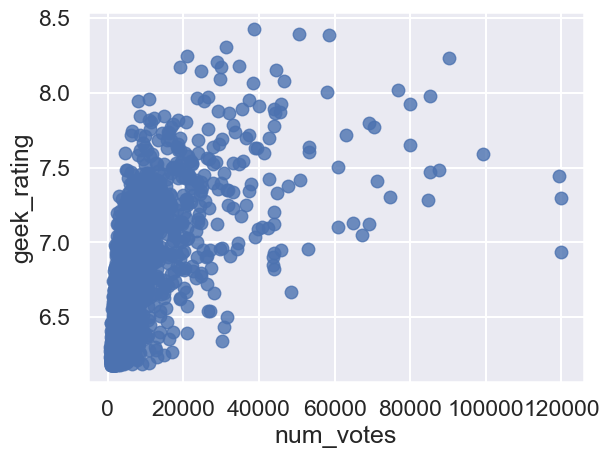

In [14]:
sns.regplot(x=games_data["num_votes"], y=games_data["geek_rating"],  fit_reg=False)

<Axes: xlabel='num_votes', ylabel='avg_rating'>

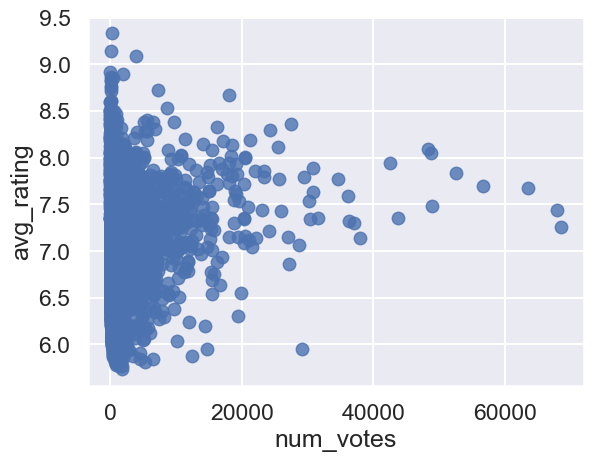

In [9]:
sns.regplot(x=early_games_data["num_votes"], y=early_games_data["avg_rating"],  fit_reg=False)

<Axes: xlabel='num_votes', ylabel='avg_rating'>

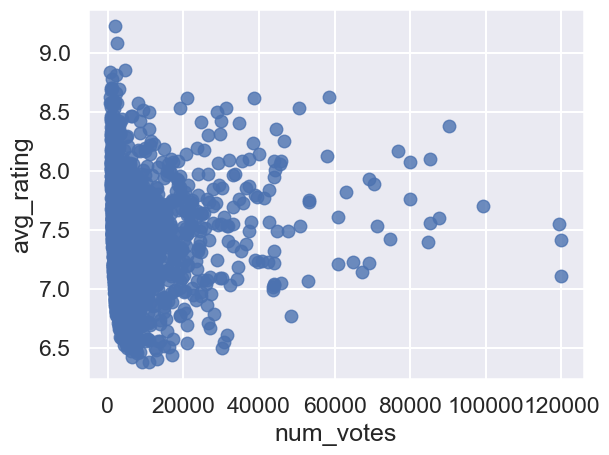

In [36]:
sns.regplot(x=games_data["num_votes"], y=games_data["avg_rating"],  fit_reg=False)

In [24]:
sns.regplot(x=early_games_data["num_votes"], y=early_games_data["avg_rating"],  fit_reg=False)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2000 and the array at index 1 has size 4999

<Axes: xlabel='avg_rating', ylabel='num_votes'>

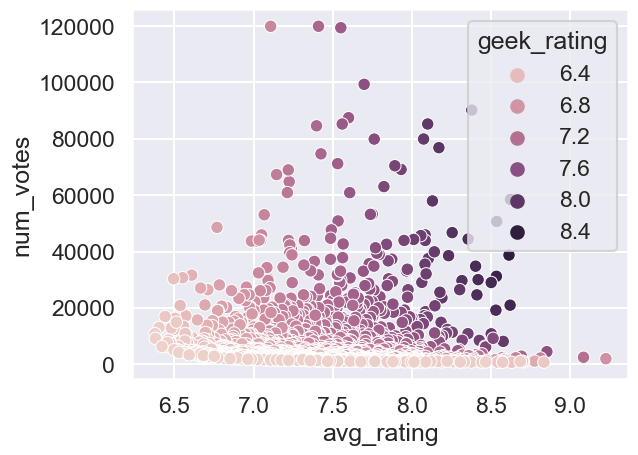

In [15]:
sns.scatterplot(data=games_data, x="avg_rating", y="num_votes", hue="geek_rating", legend=True, sizes=(30, 20))

<Axes: xlabel='avg_rating', ylabel='num_votes'>

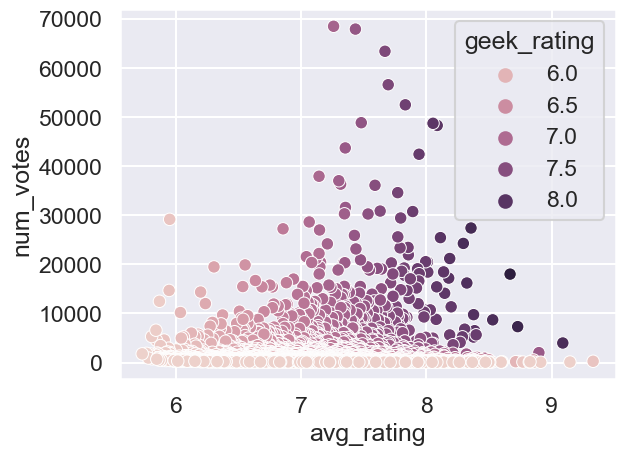

In [23]:
sns.scatterplot(data=early_games_data, x="avg_rating", y="num_votes", hue="geek_rating", legend=True, sizes=(30, 20))

In [28]:
games_data.loc[:,'min_players']

0       2
1       2
2       1
       ..
1997    1
1998    1
1999    2
Name: min_players, Length: 2000, dtype: int64

<Axes: xlabel='min_players', ylabel='avg_rating'>

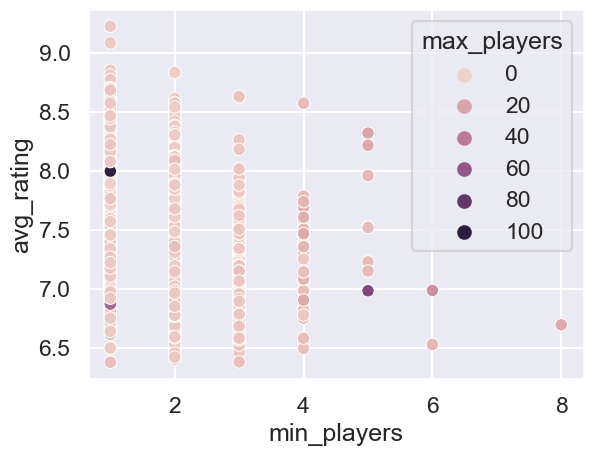

In [5]:
sns.scatterplot(data=games_data, x="min_players", y="avg_rating", hue="max_players", legend=True, sizes=(20, 10))

In [6]:
early_games_data = pd.read_csv("basic_data_2017.csv", delimiter=',')

In [17]:
early_games_data.head(5)

,Unnamed: 0,rank,bgg_url,game_id,...,age,owned,designer,weight
0,0,1,https://boardgamegeek.com/boardgame/161936/pan...,161936,...,13,29472,"Rob Daviau, Matt Leacock",2.8076
1,1,2,https://boardgamegeek.com/boardgame/182028/thr...,182028,...,14,10007,Vlaada Chvátil,4.3093
2,2,3,https://boardgamegeek.com/boardgame/12333/twil...,12333,...,13,37382,"Ananda Gupta, Jason Matthews",3.5317
3,3,4,https://boardgamegeek.com/boardgame/120677/ter...,120677,...,12,27948,"Jens Drögemüller, Helge Ostertag",3.9387
4,4,5,https://boardgamegeek.com/boardgame/174430/glo...,174430,...,12,6057,Isaac Childres,3.7028


In [19]:
results = smf.ols('geek_rating~ num_votes', data=early_games_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            geek_rating   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     3413.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:43:08   Log-Likelihood:                -2124.2
No. Observations:                4999   AIC:                             4252.
Df Residuals:                    4997   BIC:                             4265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9373      0.006   1047.508      0.0

In [22]:
early_games_data.shape

(4999, 19)

<Axes: xlabel='num_votes', ylabel='geek_rating'>

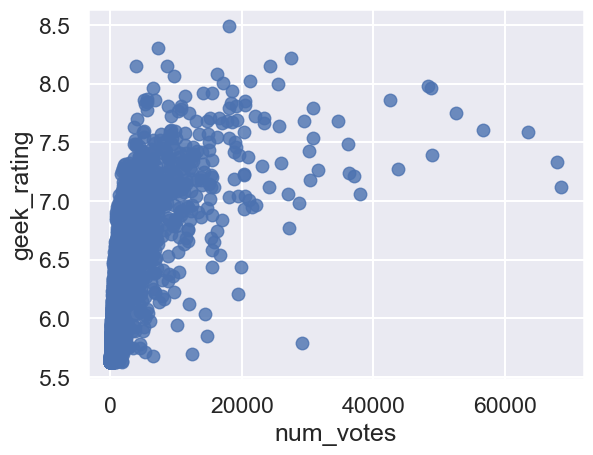

In [11]:
sns.regplot(x=early_games_data["num_votes"], y=early_games_data["geek_rating"],  fit_reg=False)